In [1]:
import os
import glob
import ast
import json
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
from dance_evaluation import *
import matplotlib.pyplot as plt

def load_from_pickle(filepath):
    # filepath = os.path.join(readpath, filename)
    with open(filepath, "rb") as f:
        json_tempodata = pickle.load(f)
    return json_tempodata

#### Load files

In [2]:
a = 60
b = 140
mode = "zero_uni"

mtyp = "vel"
scr_key = "score_multi"
bpm_dict = {"bpm_avg": 0,  "bpm_mode": 1, "bpm_median": 2}

path1 = f"./saved_result/tempo_{a}_{b}/hit_genrewise_{scr_key}_{mtyp}_{mode}_{a}_{b}.pkl"
multi_hits_genrewise = load_from_pickle(path1)      # hits summary genre wise          
multi_hits_genrewise["bpm_median"].keys()

Index(['genre', 'total', 'both_hand_x_both_foot_x_count',
       'both_hand_y_both_foot_y_count', 'bothhand_xy_bothfoot_xy_count',
       'both_hand_resultant_both_foot_resultant_count',
       'both_hand_x_both_foot_x_percentage',
       'both_hand_y_both_foot_y_percentage',
       'bothhand_xy_bothfoot_xy_percentage',
       'both_hand_resultant_both_foot_resultant_percentage'],
      dtype='object')

#### Multi-Score: Tempo Estimation Accuracy by Genre

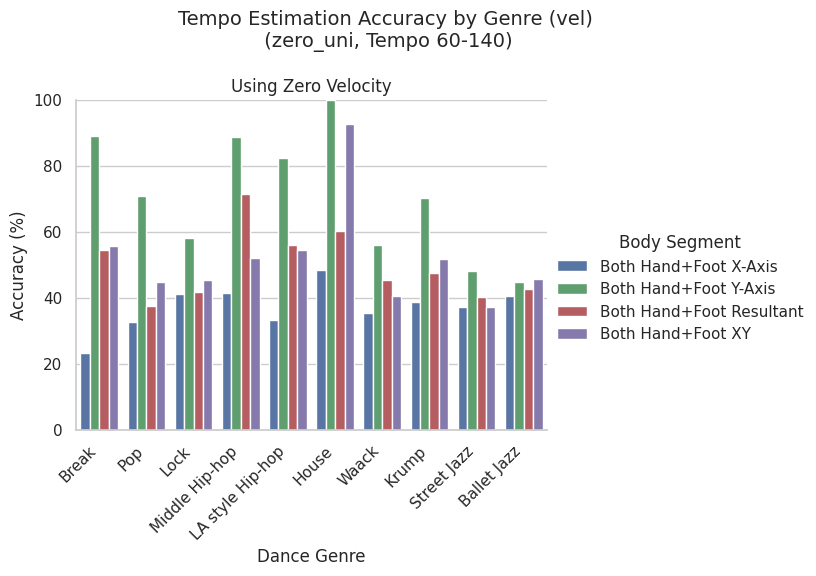

In [5]:

def melt_df(df, metric_label, value_vars=None):
    # New value_vars list for the percentage columns
    if value_vars is None:
        value_vars = [
            "both_hand_x_both_foot_x_percentage",
            "both_hand_y_both_foot_y_percentage",
            "both_hand_resultant_both_foot_resultant_percentage",
            "bothhand_xy_bothfoot_xy_percentage"
        ]
    melted = df.melt(
        id_vars=["genre"],
        value_vars=value_vars,
        var_name="Segment",
        value_name="Accuracy"
    )
    # Mapping for cleaner labels
    segment_map = {
        "both_hand_x_both_foot_x_percentage": "Both Hand+Foot X-Axis",
        "both_hand_y_both_foot_y_percentage": "Both Hand+Foot Y-Axis",
        "both_hand_resultant_both_foot_resultant_percentage": "Both Hand+Foot Resultant",
        "bothhand_xy_bothfoot_xy_percentage": "Both Hand+Foot XY"
    }
    melted["Segment"] = melted["Segment"].map(segment_map)
    melted["Metric"] = metric_label
    return melted

# Example usage:
# Assume hits_genrewise['bpm_median'] is your DataFrame with the necessary columns.
pos_melt = melt_df(multi_hits_genrewise['bpm_median'], "Using Zero Velocity")
combined_df = pos_melt.copy()

# Define a palette for each segment (easily changed later)
palette = {
    "Both Hand+Foot X-Axis": "#4C72B0",      # Deep blue
    "Both Hand+Foot Y-Axis": "#55A868",      # Muted green
    "Both Hand+Foot Resultant": "#C44E52",   # Muted red
    "Both Hand+Foot XY": "#8172B3"           # Muted purple
}

sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=combined_df,
    kind="bar",
    x="genre", 
    y="Accuracy", 
    hue="Segment",
    col="Metric",
    palette=palette,
    height=5, 
    aspect=1.2,
    legend_out=True,
    sharey=False
)

g.figure.set_dpi(100)
g.set_axis_labels("Dance Genre", "Accuracy (%)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha="right")
g.set(ylim=(0, 100))
g._legend.set_title("Body Segment")

plt.subplots_adjust(top=0.80)
g.figure.suptitle(f"Tempo Estimation Accuracy by Genre ({mtyp})\n ({mode}, Tempo {a}-{b})", fontsize=14)
plt.show()


#### Score One: Tempo Estimation Accuracy by Genre

In [3]:
a = 60
b = 140
mode = "zero_uni"

scr_key = "score_one"
bpm_dict = {"bpm_avg": 0,  "bpm_mode": 1, "bpm_median": 2}

path1 = f"./saved_result/tempo_{a}_{b}/hit_genrewise_{scr_key}_pos_{mode}_{a}_{b}.pkl"
path2 = f"./saved_result/tempo_{a}_{b}/hit_genrewise_{scr_key}_vel_{mode}_{a}_{b}.pkl"

one_pos_hits_genrewise = load_from_pickle(path1)      # hits summary genre wise    
one_vel_hits_genrewise = load_from_pickle(path2)      # hits summary genre wise    

one_pos_hits_genrewise['bpm_median'].keys()

Index(['genre', 'total', 'left_hand_x_count', 'right_hand_x_count',
       'left_hand_y_count', 'right_hand_y_count', 'left_foot_x_count',
       'right_foot_x_count', 'left_foot_y_count', 'right_foot_y_count',
       'lefthand_xy_count', 'righthand_xy_count', 'leftfoot_xy_count',
       'rightfoot_xy_count', 'left_hand_resultant_count',
       'right_hand_resultant_count', 'left_foot_resultant_count',
       'right_foot_resultant_count', 'both_hand_x_count', 'both_hand_y_count',
       'both_foot_x_count', 'both_foot_y_count', 'bothhand_xy_count',
       'bothfoot_xy_count', 'both_hand_resultant_count',
       'both_foot_resultant_count', 'left_hand_x_percentage',
       'right_hand_x_percentage', 'left_hand_y_percentage',
       'right_hand_y_percentage', 'left_foot_x_percentage',
       'right_foot_x_percentage', 'left_foot_y_percentage',
       'right_foot_y_percentage', 'lefthand_xy_percentage',
       'righthand_xy_percentage', 'leftfoot_xy_percentage',
       'rightfoot_xy_perce

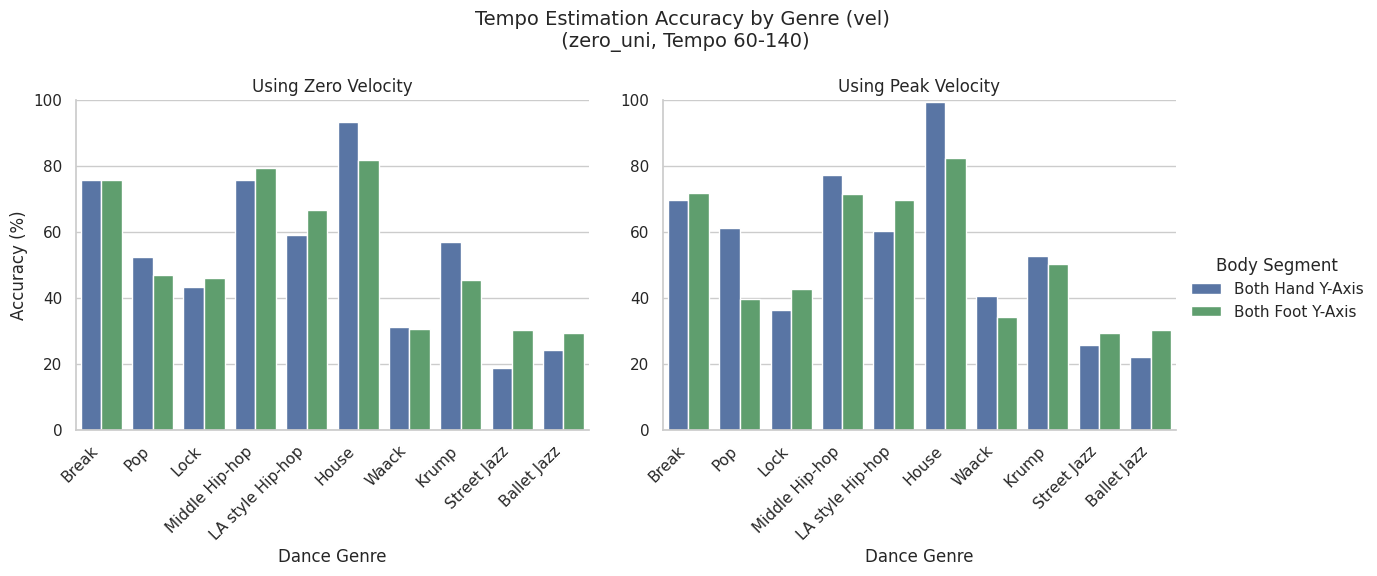

In [5]:
def melt_df(df, metric_label, value_vars=None):
    # New value_vars list for the percentage columns
    if value_vars is None:
        value_vars = [
            'both_hand_y_percentage',
            'both_foot_y_percentage',

        ]
    melted = df.melt(
        id_vars=["genre"],
        value_vars=value_vars,
        var_name="Segment",
        value_name="Accuracy"
    )
    # Mapping for cleaner labels
    segment_map = {
        "both_hand_y_percentage": "Both Hand Y-Axis",
        "both_foot_y_percentage": "Both Foot Y-Axis",

    }
    melted["Segment"] = melted["Segment"].map(segment_map)
    melted["Metric"] = metric_label
    return melted

# Example usage:
# pos_melt = melt_df(pos_hits_stats_genrewise['bpm_median'], "Using Zero Velocity")
# vel_melt = melt_df(vel_hits_stats_genrewise['bpm_median'], "Using Peak Velocity")
# # posvel_melt = melt_df(posvel_hits_stats_genrewise['bpm_median_xy'], "PosVel Median XY")

# combined_df = pd.concat([pos_melt, vel_melt])


# Assume hits_genrewise['bpm_median'] is your DataFrame with the necessary columns.
pos_melt = melt_df(one_pos_hits_genrewise['bpm_median'], "Using Zero Velocity")
vel_melt = melt_df(one_vel_hits_genrewise['bpm_median'], "Using Peak Velocity")
combined_df = pd.concat([pos_melt, vel_melt])
# combined_df = pos_melt.copy()

# Define a palette for each segment (easily changed later)
palette = {
    "Both Hand Y-Axis": "#4C72B0",      # Deep blue
    "Both Foot Y-Axis": "#55A868",      # Muted green
    # "Both Hand+Foot Resultant": "#C44E52",   # Muted red
    # "Both Hand+Foot XY": "#8172B3"           # Muted purple
}

sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=combined_df,
    kind="bar",
    x="genre", 
    y="Accuracy", 
    hue="Segment",
    col="Metric",
    palette=palette,
    height=5, 
    aspect=1.2,
    legend_out=True,
    sharey=False
)

g.figure.set_dpi(100)
g.set_axis_labels("Dance Genre", "Accuracy (%)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha="right")
g.set(ylim=(0, 100))
g._legend.set_title("Body Segment")

plt.subplots_adjust(top=0.80)
g.figure.suptitle(f"Tempo Estimation Accuracy by Genre ({mtyp})\n ({mode}, Tempo {a}-{b})", fontsize=14)
plt.show()


#### BoxPlot: Tempo Accuracy Distributions Across Dance

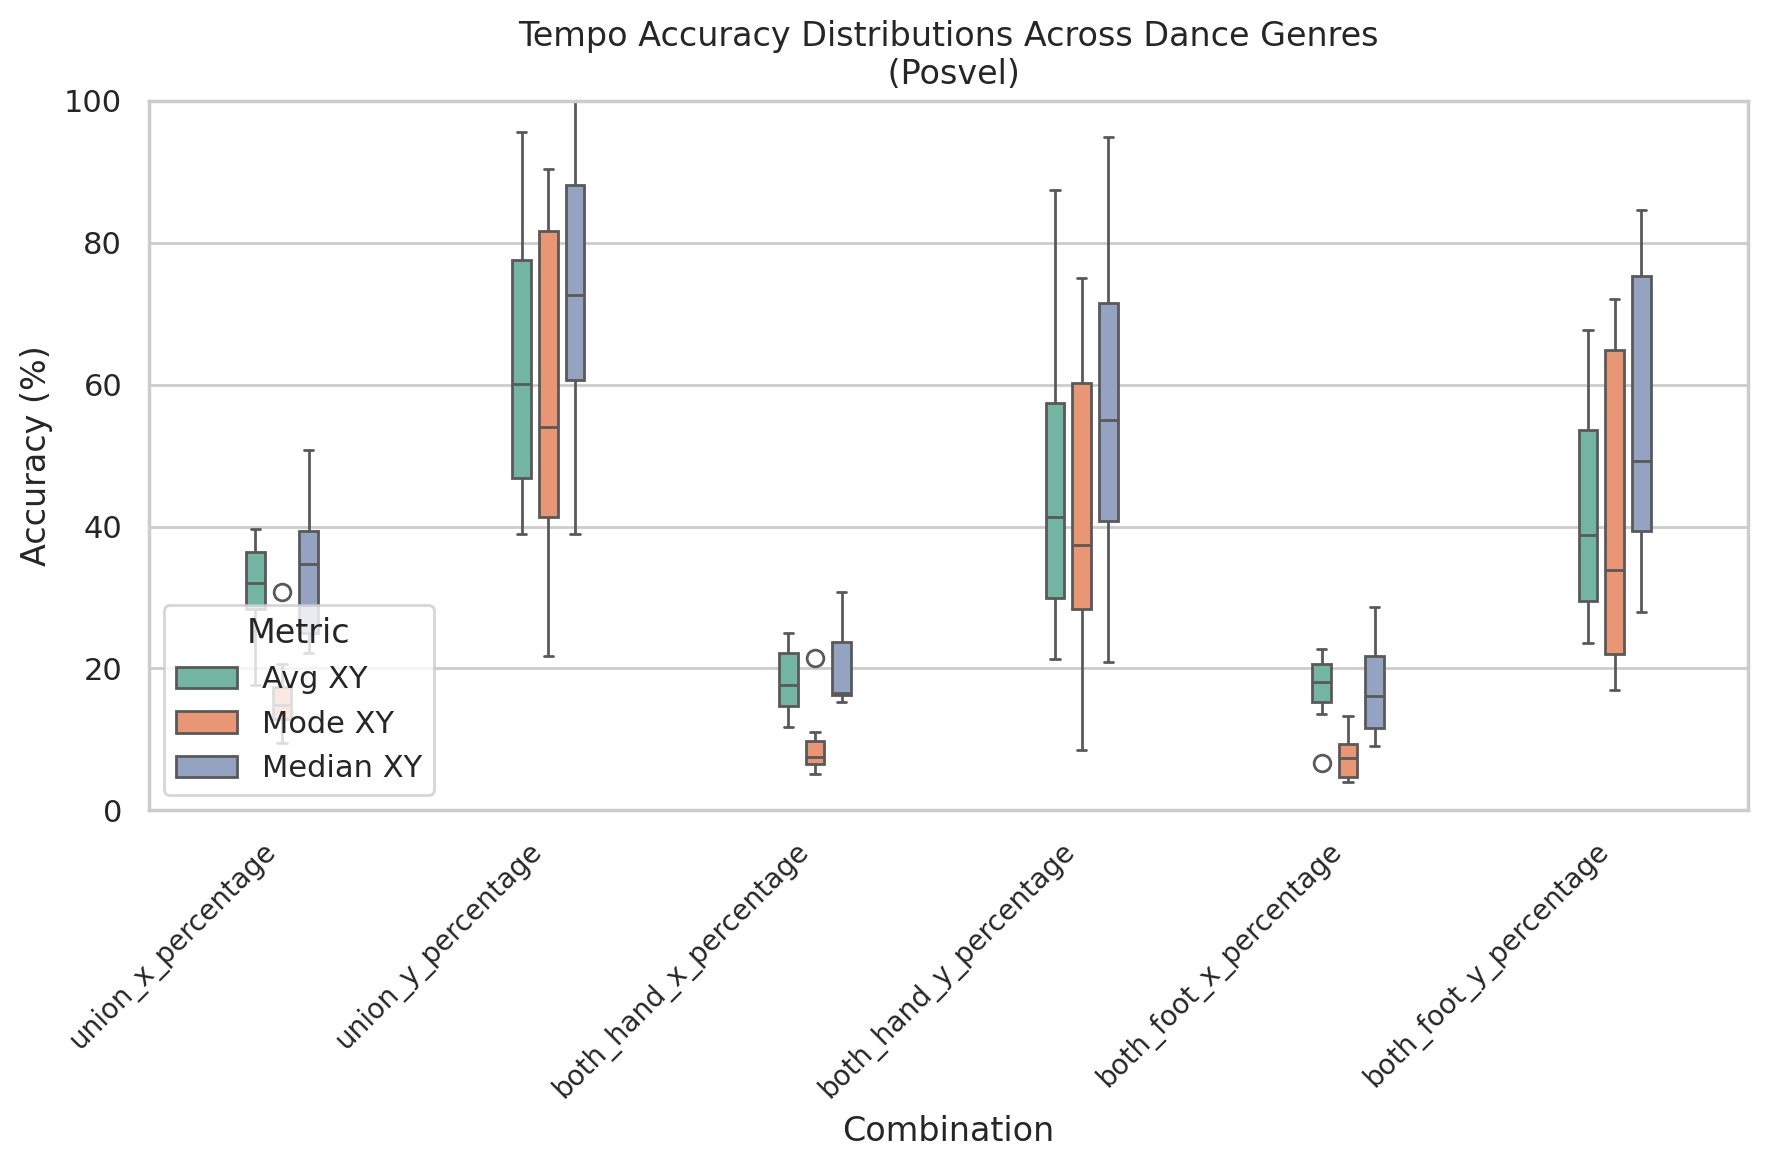

In [29]:
combination = [
    'union_x_percentage', 'union_y_percentage', 'both_hand_x_percentage', 'both_hand_y_percentage',
    'both_foot_x_percentage', 'both_foot_y_percentage'
]

# Melt each dataframe for long-form representation
avg_xy = pos_hits_stats_genrewise["bpm_avg"].melt(
    id_vars=["genre"], value_vars=combination,
    var_name="Type", value_name="Consistency (%)"
)
avg_xy["Consistency Type"] = "Avg XY"

avg_mode = pos_hits_stats_genrewise["bpm_mode"].melt(
    id_vars=["genre"], value_vars=combination,
    var_name="Type", value_name="Consistency (%)"
)
avg_mode["Consistency Type"] = "Mode XY"

avg_median = pos_hits_stats_genrewise["bpm_median"].melt(
    id_vars=["genre"], value_vars=combination,
    var_name="Type", value_name="Consistency (%)"
)
avg_median["Consistency Type"] = "Median XY"

# Combine all long-form dataframes
combined_long = pd.concat([avg_xy, avg_mode, avg_median])

# Create the grouped boxplot
plt.figure(figsize=(9, 6), dpi=200)
sns.boxplot(
    data=combined_long,
    x="Type",
    y="Consistency (%)",
    hue="Consistency Type",  # Grouping by Consistency Type
    palette="Set2",
    width=0.3,
    gap=0.3,
    # fill=False,
    linewidth=1
)

# Plot aesthetics
plt.title(f"Tempo Accuracy Distributions Across Dance Genres\n (Posvel)")
plt.xlabel("Combination")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, 100)
plt.legend(title="Metric", loc="lower left")
# plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
